In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables (Antecedents)
sleep_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'sleep_quality')
schedule_importance = ctrl.Antecedent(np.arange(0, 11, 1), 'schedule_importance')
mood = ctrl.Antecedent(np.arange(0, 11, 1), 'mood')
weather = ctrl.Antecedent(np.arange(0, 11, 1), 'weather')
preferred_wake_method = ctrl.Antecedent(np.arange(0, 11, 1), 'preferred_wake_method')

# Define fuzzy output variable (Consequent)
wake_time_adjustment = ctrl.Consequent(np.arange(-30, 31, 1), 'wake_time_adjustment')

# Membership functions for input variables

# Sleep quality
sleep_quality['poor'] = fuzz.trimf(sleep_quality.universe, [0, 0, 5])
sleep_quality['average'] = fuzz.trimf(sleep_quality.universe, [3, 5, 7])
sleep_quality['good'] = fuzz.trimf(sleep_quality.universe, [5, 10, 10])

# Schedule importance
schedule_importance['low'] = fuzz.trimf(schedule_importance.universe, [0, 0, 5])
schedule_importance['medium'] = fuzz.trimf(schedule_importance.universe, [3, 5, 7])
schedule_importance['high'] = fuzz.trimf(schedule_importance.universe, [5, 10, 10])

# Mood
mood['stressed'] = fuzz.trimf(mood.universe, [0, 0, 5])
mood['neutral'] = fuzz.trimf(mood.universe, [3, 5, 7])
mood['relaxed'] = fuzz.trimf(mood.universe, [5, 10, 10])

# Weather
weather['bad'] = fuzz.trimf(weather.universe, [0, 0, 5])
weather['average'] = fuzz.trimf(weather.universe, [3, 5, 7])
weather['good'] = fuzz.trimf(weather.universe, [5, 10, 10])

# Preferred wake-up method
preferred_wake_method['gentle'] = fuzz.trimf(preferred_wake_method.universe, [0, 0, 5])
preferred_wake_method['moderate'] = fuzz.trimf(preferred_wake_method.universe, [3, 5, 7])
preferred_wake_method['dynamic'] = fuzz.trimf(preferred_wake_method.universe, [5, 10, 10])

# Membership functions for output variable

# Wake time adjustment
wake_time_adjustment['delay'] = fuzz.trimf(wake_time_adjustment.universe, [-30, -15, 0])
wake_time_adjustment['no_change'] = fuzz.trimf(wake_time_adjustment.universe, [-5, 0, 5])
wake_time_adjustment['advance'] = fuzz.trimf(wake_time_adjustment.universe, [0, 15, 30])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


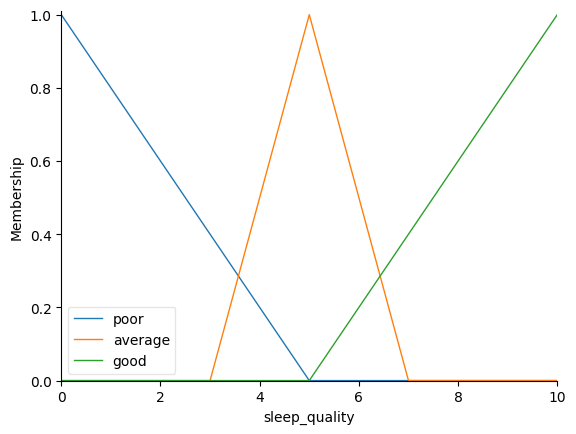

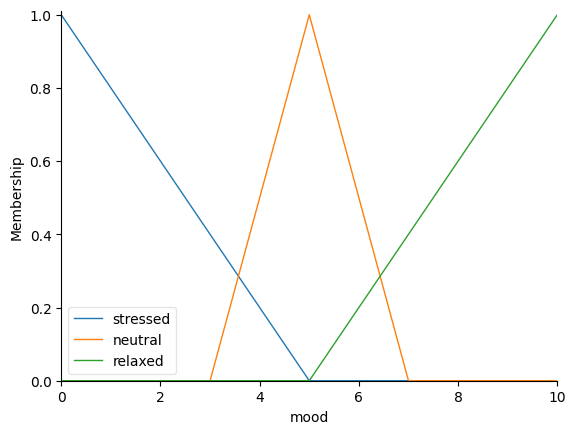

In [2]:
sleep_quality.view()
mood.view()

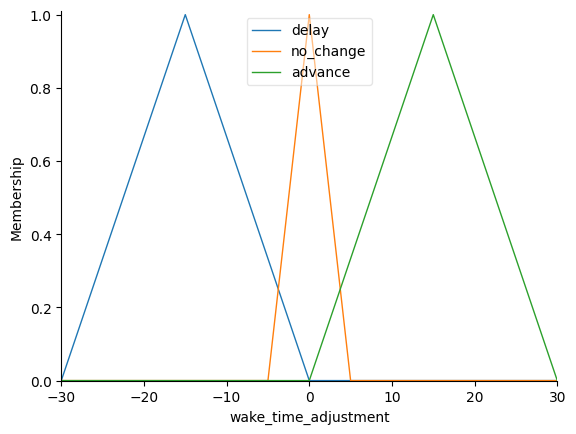

In [3]:
wake_time_adjustment.view()

In [4]:
# Define the rules for wake time adjustment based on different inputs

rules = []

# Sleep quality & schedule importance
rules.append(ctrl.Rule(sleep_quality['poor'] & schedule_importance['high'], wake_time_adjustment['no_change']))
rules.append(ctrl.Rule(sleep_quality['poor'] & schedule_importance['medium'], wake_time_adjustment['delay']))
rules.append(ctrl.Rule(sleep_quality['poor'] & schedule_importance['low'], wake_time_adjustment['delay']))

rules.append(ctrl.Rule(sleep_quality['average'] & schedule_importance['high'], wake_time_adjustment['no_change']))
rules.append(ctrl.Rule(sleep_quality['average'] & schedule_importance['medium'], wake_time_adjustment['no_change']))
rules.append(ctrl.Rule(sleep_quality['average'] & schedule_importance['low'], wake_time_adjustment['delay']))

rules.append(ctrl.Rule(sleep_quality['good'] & schedule_importance['high'], wake_time_adjustment['advance']))
rules.append(ctrl.Rule(sleep_quality['good'] & schedule_importance['medium'], wake_time_adjustment['no_change']))
rules.append(ctrl.Rule(sleep_quality['good'] & schedule_importance['low'], wake_time_adjustment['no_change']))

# Mood and schedule importance
rules.append(ctrl.Rule(mood['stressed'] & schedule_importance['high'], wake_time_adjustment['no_change']))
rules.append(ctrl.Rule(mood['stressed'] & schedule_importance['medium'], wake_time_adjustment['delay']))
rules.append(ctrl.Rule(mood['relaxed'] & sleep_quality['good'], wake_time_adjustment['advance']))
rules.append(ctrl.Rule(mood['relaxed'] & sleep_quality['poor'], wake_time_adjustment['delay']))
rules.append(ctrl.Rule(mood['neutral'] & sleep_quality['average'], wake_time_adjustment['no_change']))

# Weather and mood/sleep quality
rules.append(ctrl.Rule(weather['bad'] & schedule_importance['high'], wake_time_adjustment['no_change']))
rules.append(ctrl.Rule(weather['good'] & mood['relaxed'], wake_time_adjustment['advance']))
rules.append(ctrl.Rule(weather['average'] & mood['stressed'], wake_time_adjustment['delay']))
rules.append(ctrl.Rule(weather['good'] & sleep_quality['good'], wake_time_adjustment['advance']))

# Fallback or catch-all rules
rules.append(ctrl.Rule(sleep_quality['poor'] | mood['neutral'], wake_time_adjustment['delay']))
rules.append(ctrl.Rule(schedule_importance['low'] & mood['relaxed'], wake_time_adjustment['delay']))

# Optional default rule
rules.append(ctrl.Rule(sleep_quality['poor'] | schedule_importance['low'] | mood['relaxed'], wake_time_adjustment['no_change']))

# Add preferred_wake_method rules
rules.append(ctrl.Rule(preferred_wake_method['gentle'] & sleep_quality['good'], wake_time_adjustment['advance']))
rules.append(ctrl.Rule(preferred_wake_method['gentle'] & sleep_quality['poor'], wake_time_adjustment['no_change']))
rules.append(ctrl.Rule(preferred_wake_method['moderate'] & schedule_importance['high'], wake_time_adjustment['no_change']))
rules.append(ctrl.Rule(preferred_wake_method['moderate'] & schedule_importance['low'], wake_time_adjustment['delay']))
rules.append(ctrl.Rule(preferred_wake_method['dynamic'] & weather['good'], wake_time_adjustment['advance']))
rules.append(ctrl.Rule(preferred_wake_method['dynamic'] & weather['bad'], wake_time_adjustment['delay']))

# Integrate mood and wake method
rules.append(ctrl.Rule(mood['stressed'] & preferred_wake_method['gentle'], wake_time_adjustment['delay']))
rules.append(ctrl.Rule(mood['relaxed'] & preferred_wake_method['dynamic'], wake_time_adjustment['advance']))

In [5]:
# Create a control system and simulation
alarm_ctrl = ctrl.ControlSystem(rules=rules)
alarm_sim = ctrl.ControlSystemSimulation(alarm_ctrl)

In [6]:
# Simulate the alarm system with some example inputs
alarm_sim.input['sleep_quality'] = 6  # average sleep quality
alarm_sim.input['schedule_importance'] = 8  # high importance
alarm_sim.input['mood'] = 2  # stressed mood
alarm_sim.input['weather'] = 5  # average/bad weather
alarm_sim.input['preferred_wake_method'] = 7  # dynamic wakeup method

In [7]:
# Compute the outputs
alarm_sim.compute()

In [8]:
# Get results
print("Wake time adjustment: ", alarm_sim.output['wake_time_adjustment'])

Wake time adjustment:  -5.142857142857146
